## ML-Practical Homework 05
### Alireza Ansari
#### Studen ID: 400123114

***

## Load & Explore the Dataset

In [1]:
# IF using Colab!
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML-Semester04/Prac. HW05/heart_disease_uci.csv')
df=df.drop('id',axis=1)
df.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


***

## Pre-Processing

### 1. turning the problem to binary classification

First, we convert the problem into a Binary Classification problem and also remove the first column because the ID variable is different for each person:

In [3]:
import numpy as np
# For turning the problem to binary classification
df['num']=np.where(df['num']>0,1,0)

### 2. Missing Values

##### At the following section, for categorical features, we will use "Majoruty Vote" method to deal with categorical missing values

In [4]:
df['thal'] = df['thal'].fillna(df['thal'].value_counts().idxmax())
df['slope'] = df['slope'].fillna(df['slope'].value_counts().idxmax())
df['exang'] = df['exang'].fillna(df['exang'].value_counts().idxmax())
df['restecg'] = df['restecg'].fillna(df['restecg'].value_counts().idxmax())
df['fbs'] = df['fbs'].fillna(df['fbs'].value_counts().idxmax())


df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

#### For discontinuous feature like "ca", It is recommended to use "mod" variable for replacement.

In [5]:
df['ca'] = df['ca'].fillna(df['ca'].value_counts().idxmax())

df.isnull().sum()

age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs          0
restecg      0
thalch      55
exang        0
oldpeak     62
slope        0
ca           0
thal         0
num          0
dtype: int64

#### For Continuous(?) Features like "oldpeak", "thalch", "chol" and "trestbps", we will replace missing values with  mean of the feture.

In [6]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

df['thalch'] = df['thalch'].fillna(df['thalch'].mean())

df['chol'] = df['chol'].fillna(df['chol'].mean())

df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())


df.isnull().sum()


age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### As we can see above, there is no missing value for each feature.

### 3. Dummy Variable Indicator method

By this part of code, we will turn the categorical features to numerical ones.

In [7]:
df_dum1 = pd.get_dummies(df, columns = ['thal'])
df_dum2 = pd.get_dummies(df_dum1, columns = ['slope'])
df_dum3 = pd.get_dummies(df_dum2, columns = ['exang'])
df_dum4 = pd.get_dummies(df_dum3, columns = ['restecg'])
df_dum5 = pd.get_dummies(df_dum4, columns = ['trestbps'])
df_dum6 = pd.get_dummies(df_dum5, columns = ['cp'])
df_dum7 = pd.get_dummies(df_dum6, columns = ['dataset'])
df_dum8 = pd.get_dummies(df_dum7, columns = ['sex'])
df_dum = pd.get_dummies(df_dum8, columns = ['fbs'])


df_dum.head()

,age,chol,thalch,oldpeak,ca,num,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,...,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,sex_Female,sex_Male,fbs_False,fbs_True
0,63,233.0,150.0,2.3,0.0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
1,67,286.0,108.0,1.5,3.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,67,229.0,129.0,2.6,2.0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,37,250.0,187.0,3.5,0.0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
4,41,204.0,172.0,1.4,0.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


***

## Question 01

### In this question, we will try to bulid a decision tree based on ID3 algorithm using the given train dataset.

### PArt a
For ID3 based decision tree we install the following library. And we use it as follows for part a of this question (the input of the fit function is only train data, because for validation, this library divides the data into 4 parts using an internal method, and one part is used for validation Uses):

In [8]:
# run if you have not installed id3 package yet!
!pip install decision-tree-id3
import six
import sys
sys.modules['sklearn.externals.six'] = six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15943 sha256=695e01b98b717d1d3d22926c1b8cf4db1520f26a96c6e9eb3a8d87da9fcd69bd
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [9]:
from id3 import Id3Estimator
from sklearn.model_selection import train_test_split
from id3 import export_graphviz

names=list(df_dum.columns)
h = 0.45
#train, test = holdout(df, h)
X=df_dum.drop(columns='num',axis=1)
y=df_dum['num']
[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,test_size=1-h)

estimator = Id3Estimator()
estimator = estimator.fit(X_train, y_train)

tree = export_graphviz(estimator.tree_, 'tree.dot', names[:-1])
!dot -Tpdf tree.dot -o tree.pdf

And the result is as follows:

In [10]:
train_error=estimator.predict(X_train)-y_train
print(f'accuracy for train data is: {(1-np.abs(train_error).sum()/len(y_train))*100:0.3f}')

test_error=estimator.predict(X_test)-y_test
print(f'accuracy for test data is: {(1-np.abs(test_error).sum()/len(y_test))*100:0.3f}')

accuracy for train data is: 99.274
accuracy for test data is: 76.331


As we can see above, The accuracy for train data is: 99.274

And accuracy for test data is: 76.331

The large difference between the accuracy of the test and training data indicates that the tree is overfit. Therefore, we need to prune it.
The pdf file of the created tree is also attached.


### Part b
In this section, we did exactly the work of the previous section, but with different ratios of training and testing data. The result is as follows:

In [11]:
names=list(df.columns) # saves columns names as a list
h = [0.15,0.45,0.55,0.65,0.75,0.95] # training data percent

#train, test = holdout(df, h)
X=df_dum.drop(columns='num',axis=1)
y=df_dum['num']

test_accuarcies=[]
test_accuracies_for_h=[]
train_accuarcies=[]
train_accuracies_for_h=[]
for j in range(len(h)):
  for i in range(3):
    [X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,test_size=1-h[j])
    estimator = Id3Estimator(prune=False)
    estimator = estimator.fit(X_train, y_train)
    train_error=estimator.predict(X_train)-y_train
    train_accuarcies.append((1-np.abs(train_error).sum()/len(y_train))*100)
    test_error=estimator.predict(X_test)-y_test
    test_accuarcies.append((1-np.abs(test_error).sum()/len(y_test))*100)
  train_accuracies_for_h.append(np.mean(train_accuarcies))
  test_accuracies_for_h.append(np.mean(test_accuarcies))
  train_accuarcies=[]
  test_accuarcies=[]

print(f'accuracy for test data with h={h} is:\n {test_accuracies_for_h}')

h.append(1)
for i in range(3):
  estimator = Id3Estimator(prune=False)
  estimator = estimator.fit(X, y)
  train_error=estimator.predict(X)-y
  train_accuarcies.append((1-np.abs(train_error).sum()/len(y))*100)
train_accuracies_for_h.append(np.mean(train_accuarcies))

print(f'accuracy for train data with h={h} is:\n {train_accuracies_for_h}')


accuracy for test data with h=[0.15, 0.45, 0.55, 0.65, 0.75, 0.95] is:
 [73.01790281329924, 75.67389875082182, 76.32850241545894, 77.53623188405797, 75.65217391304348, 72.3404255319149]
accuracy for train data with h=[0.15, 0.45, 0.55, 0.65, 0.75, 0.95, 1] is:
 [100.0, 99.27360774818402, 98.81422924901186, 98.82943143812709, 98.84057971014494, 98.77815960290188, 99.1304347826087]


As we can see, The result is an increase in the accuracy of the test data and a slight decrease in the accuracy of the training data. However, the tree is still overfit.

***

## Question 02
For this question, it is necessary to make some changes in the library used. Because in this library Post-Pruning is applied at once and the result is delivered as output, but we need to know the result of pruning at each step. Therefore, we defined the TreeBuilderModified and Id3EstimatorModified classes with a slight change compared to before.

In [13]:
from id3 import tree
from id3 import Id3Estimator
import numpy as np
import numbers
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from copy import copy, deepcopy
from id3.tree import TreeBuilder, Tree
from id3.splitter import Splitter
from id3.utils import check_numerical_array, ExtendedLabelEncoder

class TreeBuilderModified(TreeBuilder):
    def __init__(self,
                 splitter,
                 y_encoder,
                 n_samples,
                 n_features,
                 is_numerical,
                 max_depth=None,
                 min_samples_split=1,
                 min_entropy_decrease=0,
                 prune=False,
                 is_repeating=False):
        self.splitter = splitter
        self.y_encoder = y_encoder
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = y_encoder.classes_.size
        self.is_numerical = is_numerical
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_entropy_decrease = min_entropy_decrease
        self.prune = prune
        self.is_repeating = is_repeating
        # i added these two
        self.tree_during_pruning=[]

    def build(self, tree, X, y, X_test=None, y_test=None):
      self.X = X
      self.y = y
      tree.root = self._build(tree, np.arange(self.n_samples),
                              np.arange(self.n_features))
      if self.prune:
          if X_test is None or y_test is None:
              raise ValueError("Can't prune tree without validation data")
          self._predict(tree, X_test, y_test)
          self.referred_tree=tree
          self._prune(tree.root, tree)


    def _prune(self, node, tree):
        if node.is_feature:
            node.predicts = np.zeros(self.n_classes)
            n_children_correct = 0
            for child, _ in node.children:
                self._prune(child, tree)
                if child.predicts is not None:
                    node.predicts += child.predicts
                    n_children_correct += child.n_correct_predicts
                    child.predicts = None
                    child.n_correct_predicts = 0
            n_predicts = np.sum(node.predicts)
            if n_predicts > 0:
                max_class = np.argmax(node.predicts)
                children_error_rate = np.true_divide(n_predicts
                                                     - n_children_correct,
                                                     n_predicts)
                node_error_rate = np.true_divide(n_predicts
                                                 - node.predicts[max_class],
                                                 n_predicts)

                if node_error_rate < children_error_rate:
                    node.is_feature = False
                    node.value = max_class
                    node.n_correct_predicts = node.predicts[max_class]
                    node.children = []
                    self.tree_during_pruning.append(deepcopy(tree))
                    #print(self.tree_during_pruning)
                else:
                    node.n_correct_predicts = n_children_correct

In [14]:
class Id3EstimatorModified(Id3Estimator):
    def fit(self, X, y, check_input=True,auto_validation=True,X_val=[],y_val=[]):
        X_, y_ = check_X_y(X, y)
        if auto_validation==False :
          X_val,y_val=check_X_y(X_val,y_val)
        self.y_encoder_ = ExtendedLabelEncoder()
        y_ = self.y_encoder_.fit_transform(y_)

        max_np_int = np.iinfo(np.int32).max
        if not isinstance(self.max_depth, (numbers.Integral, np.integer)):
            max_depth = max_np_int
        else:
            max_depth = self.max_depth

        if isinstance(self.min_samples_split,
                      (numbers.Integral, np.integer)):
            min_samples_split = (1 if self.min_samples_split < 1
                                 else self.min_samples_split)
        else:
            min_samples_split = 1

        if isinstance(self.min_entropy_decrease,
                      (np.float32, np.integer)):
            min_entropy_decrease = (0 if self.min_entropy_decrease < 0
                                    else self.min_entropy_decrease)
        else:
            min_entropy_decrease = 0

        _, self.n_features_ = X_.shape
        self.is_numerical_ = [False] * self.n_features_
        X_tmp = np.zeros(X_.shape, dtype=np.float32)
        self.X_encoders_ = [ExtendedLabelEncoder() for _ in
                           range(self.n_features_)]
        for i in range(self.n_features_):
            if check_input and check_numerical_array(X_[:, i]):
                self.is_numerical_[i] = True
                X_tmp[:, i] = X_[:, i]
            else:
                X_tmp[:, i] = self.X_encoders_[i].fit_transform(X_[:, i])
        X_ = X_tmp
        if self.prune:
            if auto_validation:
              X_, X_test, y_, y_test = train_test_split(X_,y_,test_size=0.25)
              self.X_val=X_test
              self.X_train=X_
              self.y_train=y_
              self.y_val=y_test
            else:
              X_test=X_val
              y_test=y_val
              self.X_val=X_test
              self.X_train=X_
              self.y_train=y_
              self.y_val=y_test

        splitter = Splitter(X_,
                            y_,
                            self.is_numerical_,
                            self.X_encoders_,
                            self.gain_ratio)

        self.builder_ = TreeBuilderModified(splitter,
                                    self.y_encoder_,
                                    X_.shape[0],
                                    self.n_features_,
                                    self.is_numerical_,
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_entropy_decrease=min_entropy_decrease,
                                    prune=self.prune,
                                    is_repeating=self.is_repeating)
        self.tree_ = Tree(X_encoders=self.X_encoders_,
                          y_encoder=self.y_encoder_)
        if self.prune:
            self.builder_.build(self.tree_, X_, y_, X_test, y_test)
            self.tree_during_pruning=self.builder_.tree_during_pruning
        else:
            self.builder_.build(self.tree_, X_, y_)

            self.tree_during_pruning=[]
        return self

    def predict(self, X):
        check_is_fitted(self, 'tree_')
        X = check_array(X)
        n_features = X.shape[1]
        if n_features != self.n_features_:
            raise ValueError("Number of features of the model must "
                             "match the input. Model n_features is {} and "
                             "input n_features is {}."
                             .format(self.n_features_, n_features))

        X_ = np.empty(X.shape)
        for i in range(self.n_features_):
            if self.is_numerical_[i]:
                X_[:, i] = X[:, i]
            else:
                try:
                    X_[:, i] = self.X_encoders_[i].transform(X[:, i])
                except ValueError as e:
                    raise ValueError('New attribute value not found in '
                                     'train data.')
        y = self.builder_._predict(self.tree_, X_)
        return self.y_encoder_.inverse_transform(y)

### Part a

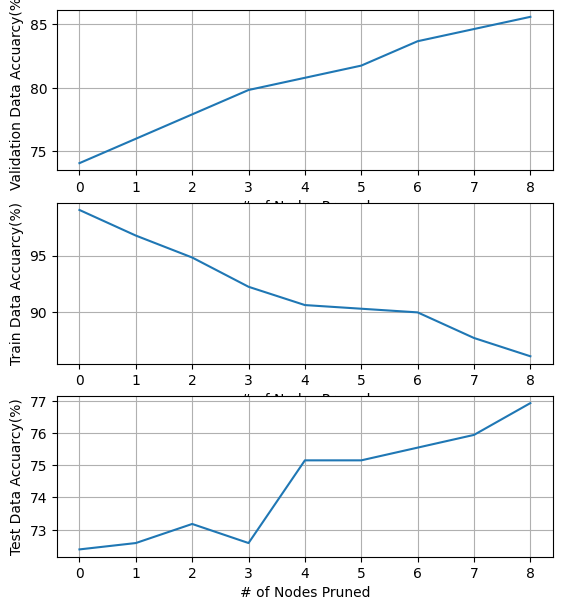

In [19]:
import matplotlib.pyplot as plt

X=df_dum.drop(columns=df.columns[-1]) #features
y=df_dum[df.columns[-1]][:] #targets

# 45% of dataset as training data and 25% of training data as validation data
h=0.45
[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,test_size=1-h)
# commented the code below, because the defined class Id3EstimatorModified has a built-in divivder for validation data
#[X_train, X_val, y_train, y_val]=train_test_split(X_train,y_train,stratify=y_train,test_size=0.25)
estimator = Id3EstimatorModified(min_samples_split=1,prune=True)
estimator = estimator.fit(X_train, y_train)
X_train=estimator.X_train
y_train=estimator.y_train
y_val=estimator.y_val
X_val=estimator.X_val

val_accuracies=[]
train_accuracies=[]
test_accuracies=[]

names=list(df_dum.columns) # saves columns names as a list
tree = export_graphviz(estimator.tree_during_pruning[0], 'tree_nonpruned.dot', names[:-1])
!dot -Tpdf tree_nonpruned.dot -o tree_nonpruned.pdf

for i in range(len(estimator.tree_during_pruning)):
  estimator.tree_=estimator.tree_during_pruning[i]

  val_error=np.abs(estimator.predict(X_val)-y_val).sum()/len(y_val)
  val_accuracies.append((1-val_error)*100)

  train_error=np.abs(estimator.predict(X_train)-y_train).sum()/len(y_train)
  train_accuracies.append((1-train_error)*100)

  test_error=np.abs(estimator.predict(X_test)-y_test).sum()/len(y_test)
  test_accuracies.append((1-test_error)*100)

tree = export_graphviz(estimator.tree_during_pruning[-1], 'tree_pruned.dot', names[:-1])
!dot -Tpdf tree_pruned.dot -o tree_pruned.pdf

prune_level=range(len(estimator.tree_during_pruning))

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(top=1.25)

axs[0].plot(prune_level,val_accuracies)
axs[0].set(xlabel='# of Nodes Pruned', ylabel='Validation Data Accuarcy(%)')
axs[0].grid()


axs[1].plot(prune_level,train_accuracies)
axs[1].set(xlabel='# of Nodes Pruned', ylabel='Train Data Accuarcy(%)')
axs[1].grid()

axs[2].plot(prune_level,test_accuracies)
axs[2].set(xlabel='# of Nodes Pruned', ylabel='Test Data Accuarcy(%)')
axs[2].grid()

plt.savefig("Q02_Part A.png")

In this part, we train the tree in the same way as before, with the difference that we set the Prune parameter in the fit function equal to True. The result for different data is obtained in the form of the above diagrams.

### Part b
This time we did the same as before, but using K-fold Validation (K=4) for evaluation Method.

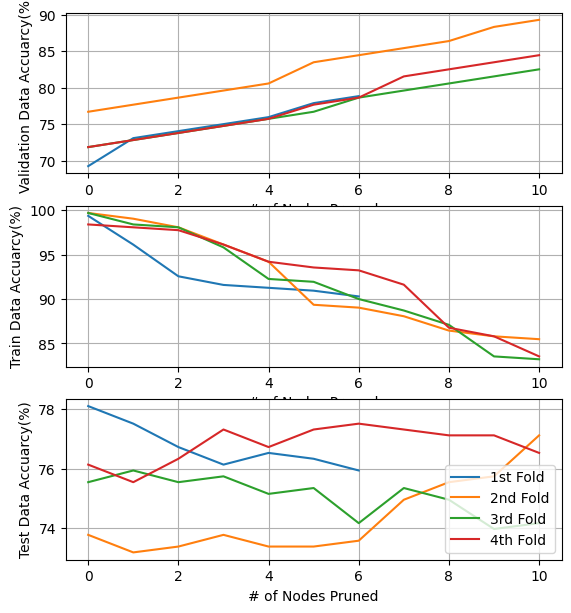

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
#kf.get_n_splits(df)

# 45% of dataset as training data and 25% of training data as validation data
h=0.45
[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,test_size=1-h)

cv=[]

all_val_accuracies=[]
all_train_accuracies=[]
all_test_accuracies=[]
prune_levels=[]
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
  train_data=X_train.iloc[train_index]
  val_data=X_train.iloc[test_index]
  train_target=y_train.iloc[train_index]
  val_target=y_train.iloc[test_index]

  estimator = Id3EstimatorModified(min_samples_split=1,prune=True)
  estimator = estimator.fit(train_data, train_target,auto_validation=False, X_val=val_data, y_val=val_target)

  val_accuracies=[]
  train_accuracies=[]
  test_accuracies=[]
  prune_levels.append(len(estimator.tree_during_pruning))
  for i in range(len(estimator.tree_during_pruning)):
    estimator.tree_=estimator.tree_during_pruning[i]

    val_error=np.abs(estimator.predict(val_data)-val_target).sum()/len(val_target)
    val_accuracies.append((1-val_error)*100)

    train_error=np.abs(estimator.predict(train_data)-train_target).sum()/len(train_target)
    train_accuracies.append((1-train_error)*100)

    test_error=np.abs(estimator.predict(X_test)-y_test).sum()/len(y_test)
    test_accuracies.append((1-test_error)*100)

  all_val_accuracies.append(val_accuracies)
  all_train_accuracies.append(train_accuracies)
  all_test_accuracies.append(test_accuracies)

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(top=1.25)

for i in range(4):
  axs[0].plot(range(prune_levels[i]),all_val_accuracies[i])
  axs[1].plot(range(prune_levels[i]),all_train_accuracies[i])
  axs[2].plot(range(prune_levels[i]),all_test_accuracies[i])


axs[0].set(xlabel='# of Nodes Pruned', ylabel='Validation Data Accuarcy(%)')
axs[0].grid()

axs[1].set(xlabel='# of Nodes Pruned', ylabel='Train Data Accuarcy(%)')
axs[1].grid()

axs[2].set(xlabel='# of Nodes Pruned', ylabel='Test Data Accuarcy(%)')
axs[2].grid()

plt.legend(['1st Fold','2nd Fold','3rd Fold','4th Fold'])
plt.savefig("Q02_Part B.png")
